<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions. 

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

In [11]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
csv_file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv"
marvel = pd.read_csv(csv_file)
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Q1. How big is this dataset? 
Use pandas to find out the number of rows and columns.

In [13]:
marvel.shape

(16376, 13)

## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

#### Which identity status of Marvel characters makes the least number of appearances in comic books starting from the year 2010?

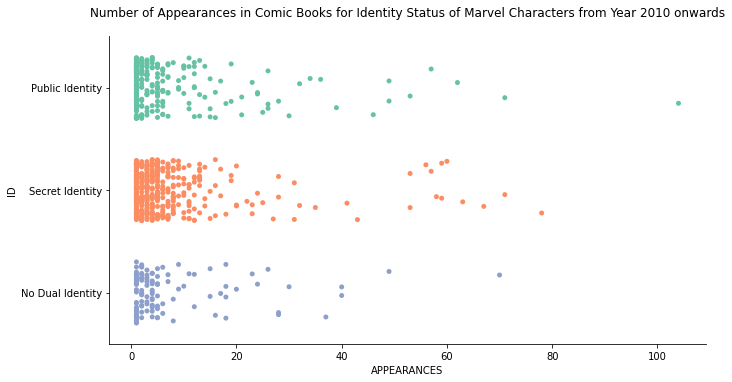

In [14]:
sns.catplot(
    data=marvel[marvel["Year"] >= 2010.0],
    x="APPEARANCES",
    y="ID",
    aspect=2,
    height=5,
    jitter=0.3,
    palette="Set2"
)
plt.title("Number of Appearances in Comic Books for Identity Status of Marvel Characters from Year 2010 onwards", pad=20);

Looking at the strip plot, it seems that Marvel characters with no dual identity make the least number of appearances in comic books starting from the year 2010.

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

#### How does the character alignment of Marvel characters affect their number of appearances in comic books for identity status starting from the year 2010?

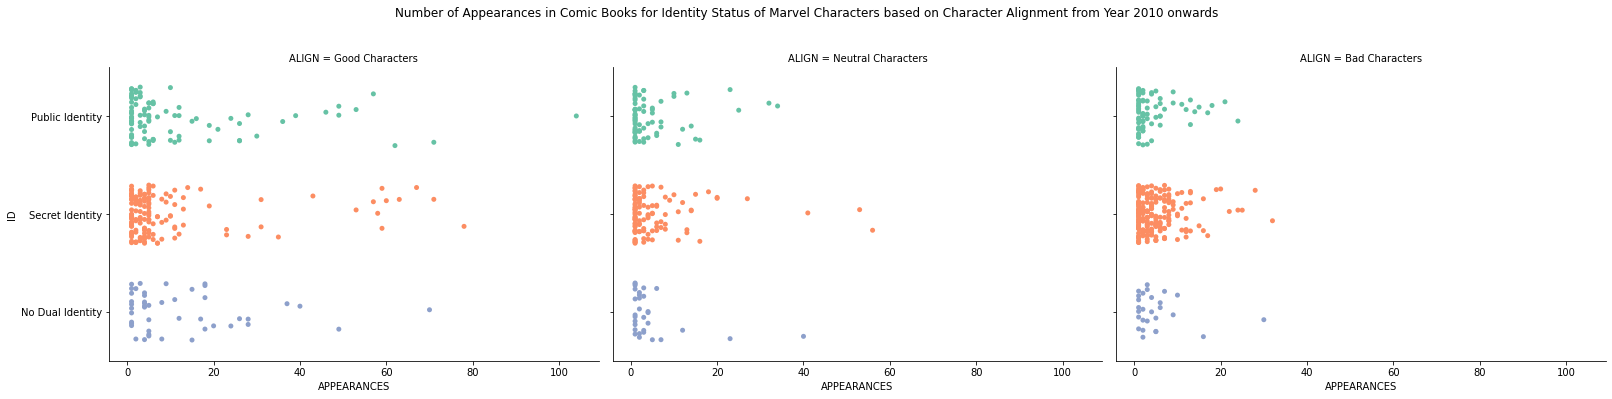

In [15]:
g = sns.catplot(
    data=marvel[marvel["Year"] >= 2010.0],
    x="APPEARANCES",
    y="ID",
    col="ALIGN",
    aspect=1.5,
    height=5,
    jitter=0.3,
    palette="Set2"
)
g.fig.suptitle("Number of Appearances in Comic Books for Identity Status of Marvel Characters based on Character Alignment from Year 2010 onwards", y=1.1);

Looking at the strip plots above, it appears that good Marvel Characters make more number of appearances in comic books for each identity status compared to those of neutral and bad Marvel characters starting from the year 2010.

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

#### Which hair-colored Marvel characters make their first appearance in comic books almost every year?

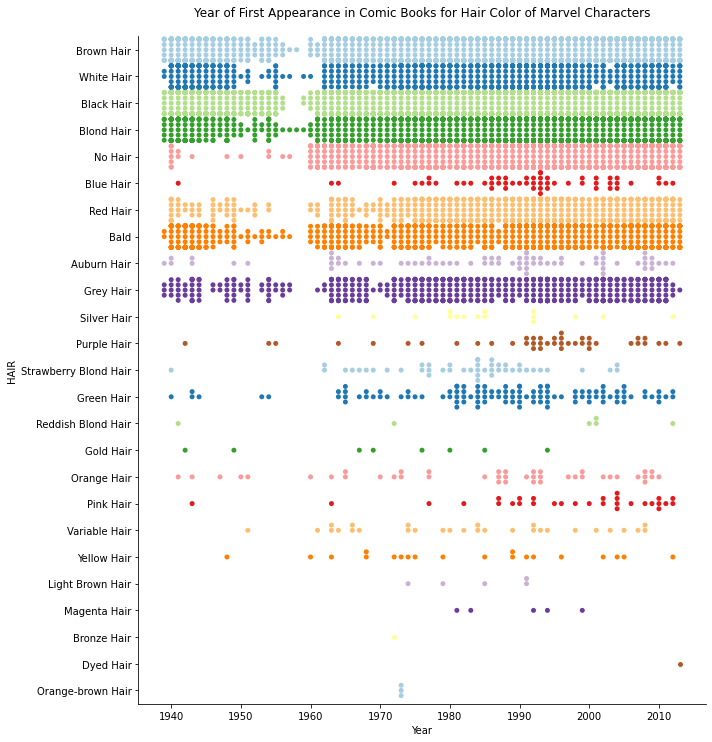

In [16]:
sns.catplot(
    data=marvel,
    x="Year",
    y="HAIR",
    aspect=1,
    kind="swarm",
    height=10,
    palette="Paired"
)
plt.title("Year of First Appearance in Comic Books for Hair Color of Marvel Characters", pad=20);

Looking at the swarm plot, it appears that Marvel characters with brown hair, white hair, black hair, blond hair, no hair, red hair, bald, and grey hair make their first appearance in comic books almost every year.

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

#### Which hair-colored Marvel characters have on average the greatest number of appearances for less than 30 appearances in comic books?

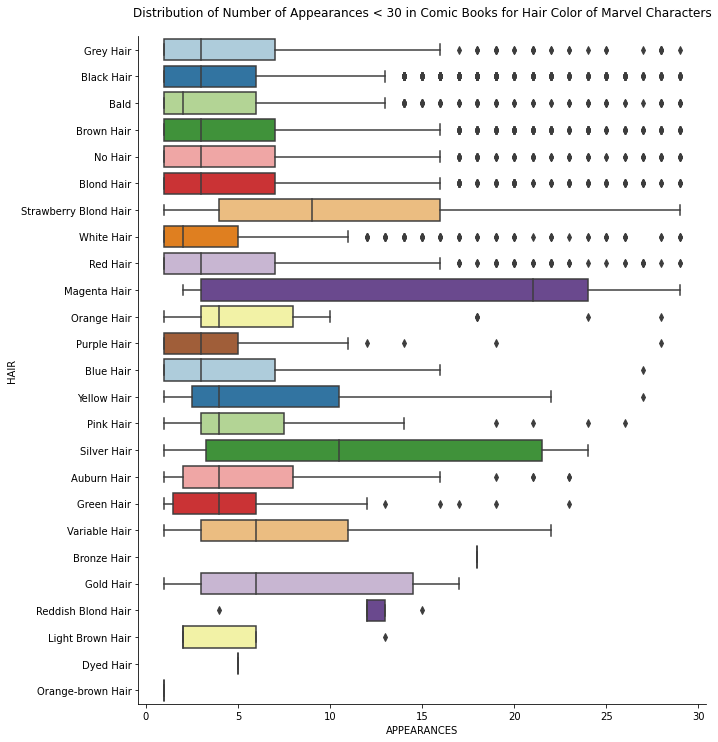

In [17]:
sns.catplot(
    data=marvel[marvel["APPEARANCES"] < 30],
    x="APPEARANCES",
    y="HAIR",
    aspect=1,
    kind="box",
    height=10,
    palette="Paired"
)
plt.title("Distribution of Number of Appearances < 30 in Comic Books for Hair Color of Marvel Characters", pad=20);

Looking at the box plot, it appears that magenta-haired, silver-haired, and strawberry blond-haired Marvel characters have on average the greatest number of appearances for less than 30 appearances in comic books.

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

#### How does the distribution of the number of appearances in comic books between 50 and 150 appearances compare for male and female Marvel characters after the year 2000?

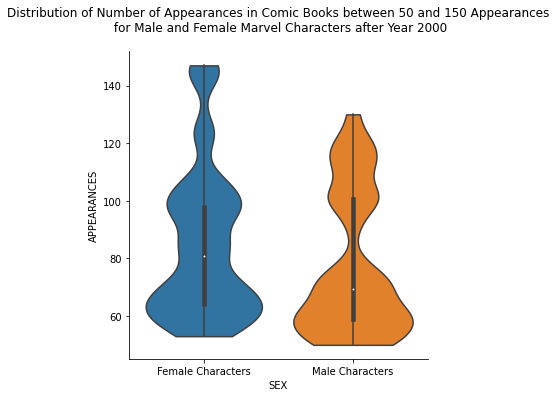

In [18]:
sns.catplot(
    data=marvel[(marvel["SEX"].isin(["Male Characters", "Female Characters"])) & (marvel["APPEARANCES"].between(50,150)) & (marvel["Year"] > 2000)],
    x="SEX",
    y="APPEARANCES",
    kind="violin",
    cut=0,
    bw=0.2,
    scale="count"
)
plt.title("Distribution of Number of Appearances in Comic Books between 50 and 150 Appearances\n for Male and Female Marvel Characters after Year 2000", pad=20);

Looking at the violin plot, female characters have an overall wider distribution than male characters. The median number of appearances for female characters is greater than that of male characters. Many female and male characters make between ~60-70 appearances, but very few male characters make between ~80-90 appearances in contrast to female characters. In addition, virtually no male characters make between ~135-150 appearances.

## Bonus: 
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories. 

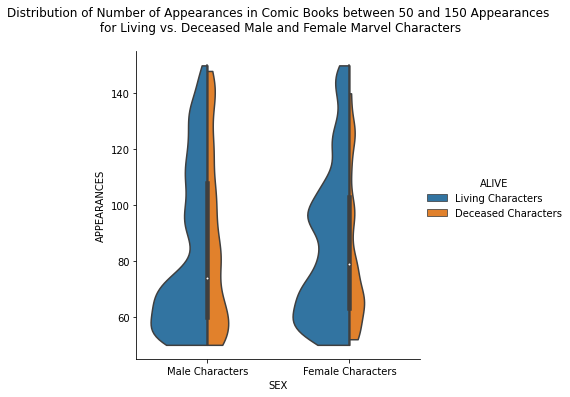

In [19]:
sns.catplot(
    data=marvel[(marvel["SEX"].isin(["Male Characters", "Female Characters"])) & (marvel["APPEARANCES"].between(50,150))],
    x="SEX",
    y="APPEARANCES",
    kind="violin",
    cut=0,
    bw=0.2,
    scale="count",
    split=True,
    hue="ALIVE"
)
plt.title("Distribution of Number of Appearances in Comic Books between 50 and 150 Appearances\n for Living vs. Deceased Male and Female Marvel Characters", pad=20);